In [ ]:
!pip install scikit-learn micromlgen

In [ ]:
import pandas as pd

In [ ]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/datasetEV.csv')  # Thay 'data.csv' bằng đường dẫn file thực tế của bạn

# Kiểm tra dữ liệu để đảm bảo các cột có sẵn
print(df.head())

   AQI     CO  PM10  PM25
0  NaN  170.6  58.8  47.0
1  NaN  158.7  56.3  45.0
2  NaN  150.2  52.5  42.0
3  NaN  141.6  56.3  45.0
4  NaN  133.1  52.5  42.0


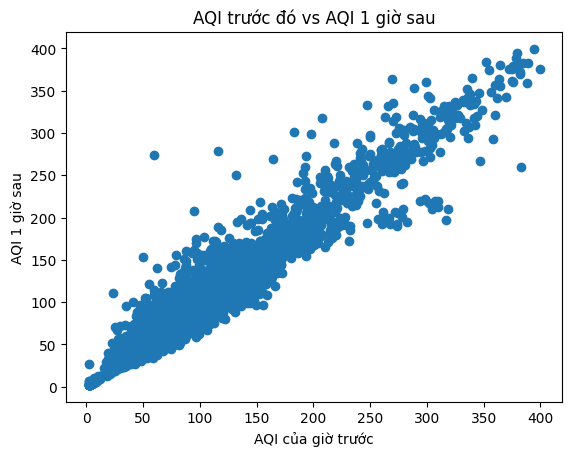

Mean Squared Error: 168.9702004650544
R-squared: 0.9426786030349087
Mean Absolute Error: 7.8049858868404005


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Giả sử bạn có một DataFrame df chứa cột 'AQI' đại diện cho AQI theo từng giờ

# Tạo các cột dữ liệu lùi (lagging data) cho các giờ trước
df['AQI_prev_1'] = df['AQI'].shift(1)  # AQI của 1 giờ trước
df['AQI_prev_2'] = df['AQI'].shift(2)  # AQI của 2 giờ trước
df['AQI_prev_3'] = df['AQI'].shift(3)  # AQI của 3 giờ trước


# Vẽ scatter plot giữa AQI_prev và AQI
plt.scatter(df['AQI_prev_1'], df['AQI'])
plt.xlabel('AQI của giờ trước')
plt.ylabel('AQI 1 giờ sau')
plt.title('AQI trước đó vs AQI 1 giờ sau')
plt.show()

# Xóa các hàng có giá trị NaN do tạo dữ liệu lùi
df = df.dropna()

# Bước 1: Chuẩn bị dữ liệu với nhiều giờ trước (nhiều biến độc lập)
X = df[['AQI_prev_1', 'AQI_prev_2', 'AQI_prev_3']]  # Sử dụng AQI của 3 giờ trước để dự đoán
y = df['AQI']  # Biến phụ thuộc: AQI của giờ hiện tại (1 giờ sau)

# Bước 2: Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bước 3: Khởi tạo và huấn luyện mô hình Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Bước 4: Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Bước 5: Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Tính Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# In kết quả đánh giá
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')


# Mục mới

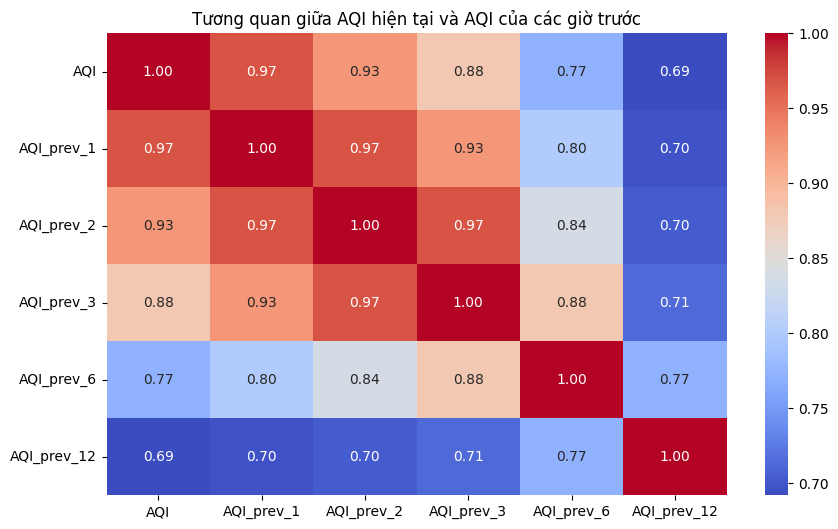

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử bạn có một DataFrame df chứa cột 'AQI' đại diện cho AQI theo từng giờ

# Tạo các cột dữ liệu lùi (lagging data) cho nhiều giờ trước
df['AQI_prev_1'] = df['AQI'].shift(1)  # AQI của 1 giờ trước
df['AQI_prev_2'] = df['AQI'].shift(2)  # AQI của 2 giờ trước
df['AQI_prev_3'] = df['AQI'].shift(3)  # AQI của 3 giờ trước
df['AQI_prev_6'] = df['AQI'].shift(6)  # AQI của 6 giờ trước
df['AQI_prev_12'] = df['AQI'].shift(12)  # AQI của 12 giờ trước

# Xóa các hàng có giá trị NaN do tạo dữ liệu lùi
df = df.dropna()

# Tính ma trận tương quan
correlation_matrix = df[['AQI', 'AQI_prev_1', 'AQI_prev_2', 'AQI_prev_3', 'AQI_prev_6', 'AQI_prev_12']].corr()

# Vẽ heatmap tương quan
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Tương quan giữa AQI hiện tại và AQI của các giờ trước')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Chuẩn bị dữ liệu với các giờ trước (AQI_prev_1, AQI_prev_2, AQI_prev_3)
X = df[['AQI_prev_1', 'AQI_prev_2', 'AQI_prev_3']]  # Đầu vào: AQI của các giờ trước
y = df['AQI']  # Đầu ra: AQI của giờ hiện tại (1 giờ sau)

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Huấn luyện mô hình
model_rf.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_rf = model_rf.predict(X_test)

# Đánh giá mô hình
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
# Tính Mean Absolute Error
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# In kết quả đánh giá
print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - R-squared: {r2_rf}')
print(f'Mean Absolute Error: {mae_rf}')

Random Forest - Mean Squared Error: 180.39384241114885
Random Forest - R-squared: 0.9365216550683759
Mean Absolute Error: 8.463629804817959


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Khởi tạo mô hình XGBoost Regressor
model_xgb = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Huấn luyện mô hình
model_xgb.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_xgb = model_xgb.predict(X_test)

# Đánh giá mô hình
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost - Mean Squared Error: {mse_xgb}')
print(f'XGBoost - R-squared: {r2_xgb}')


XGBoost - Mean Squared Error: 192.40035488352925
XGBoost - R-squared: 0.9322967129641409


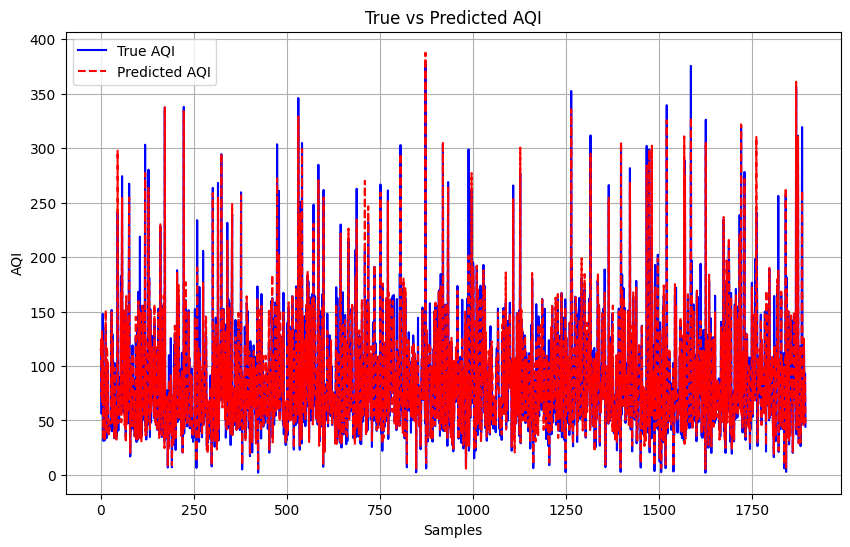

In [ ]:
import matplotlib.pyplot as plt
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Vẽ biểu đồ kết quả dự đoán so với giá trị thực tế
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='True AQI', color='blue')  # Sử dụng y_test.values nếu là Pandas series
plt.plot(y_pred, label='Predicted AQI', color='red', linestyle='dashed')
plt.title('True vs Predicted AQI')
plt.xlabel('Samples')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

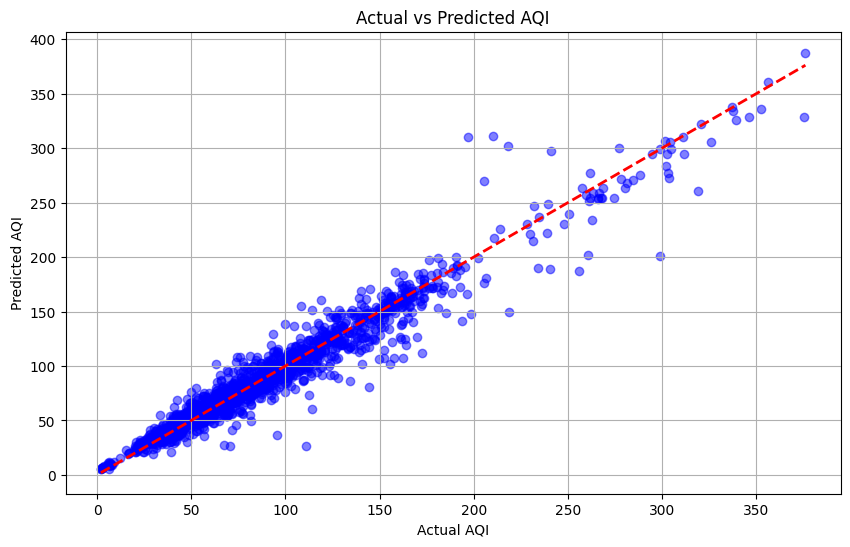

In [ ]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ so sánh giữa giá trị thực tế và giá trị dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.title('Actual vs Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.grid(True)
plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
# Lấy trọng số và intercept
weights = model.coef_
intercept = model.intercept_

print("Weights:", weights)
print("Intercept:", intercept)


Weights: [ 1.12462003 -0.14437236 -0.02107856]
Intercept: 3.511364629037118


In [ ]:
import joblib

# Tải mô hình đã lưu
model = joblib.load('linear_regression_model.pkl')

# Lấy hệ số (coefficients) và intercept
coefficients = model.coef_
intercept = model.intercept_

# In hệ số và intercept để kiểm tra
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [ 1.12462003 -0.14437236 -0.02107856]
Intercept: 3.511364629037118


In [ ]:
# Tạo mã C để sử dụng các hệ số và intercept
with open("linear_regression_model.h", "w") as f:
    f.write("#ifndef LINEAR_REGRESSION_MODEL_H\n")
    f.write("#define LINEAR_REGRESSION_MODEL_H\n\n")

    # Viết hệ số vào file .h
    f.write("float coefficients[] = {")
    f.write(", ".join([f"{coef:.6f}" for coef in coefficients]))
    f.write("};\n")

    # Viết intercept
    f.write(f"float intercept = {intercept:.6f};\n\n")

    # Hàm dự đoán
    f.write("float predict(float features[]) {\n")
    f.write("    float result = intercept;\n")
    f.write("    for (int i = 0; i < sizeof(coefficients) / sizeof(coefficients[0]); i++) {\n")
    f.write("        result += coefficients[i] * features[i];\n")
    f.write("    }\n")
    f.write("    return result;\n")
    f.write("}\n\n")

    f.write("#endif // LINEAR_REGRESSION_MODEL_H\n")
